In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train = pd.read_csv("../dataset/X_train.csv")
X_test = pd.read_csv("../dataset/X_test.csv")

y_train = pd.read_csv("../dataset/y_train.csv").values.ravel()
y_test = pd.read_csv("../dataset/y_test.csv").values.ravel()

In [4]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(type(model).__name__)
    plt.show()

Logistic Regression Results
Accuracy : 0.8498098859315589
Precision: 0.9107142857142857
Recall   : 0.7756653992395437
F1 Score : 0.837782340862423

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       263
           1       0.91      0.78      0.84       263

    accuracy                           0.85       526
   macro avg       0.86      0.85      0.85       526
weighted avg       0.86      0.85      0.85       526



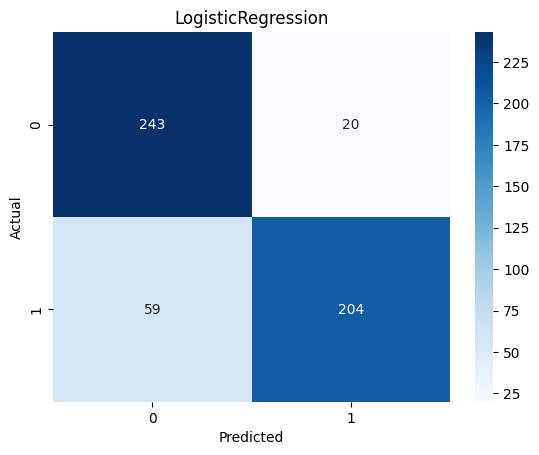

In [5]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Logistic Regression Results")
evaluate_model(lr, X_test, y_test)

SVM Results
Accuracy : 0.8650190114068441
Precision: 0.9660194174757282
Recall   : 0.7566539923954373
F1 Score : 0.8486140724946695

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       263
           1       0.97      0.76      0.85       263

    accuracy                           0.87       526
   macro avg       0.88      0.87      0.86       526
weighted avg       0.88      0.87      0.86       526



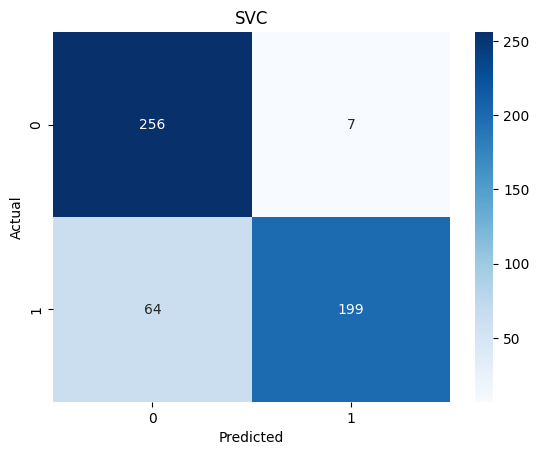

In [6]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

print("SVM Results")
evaluate_model(svm, X_test, y_test)

SVM Results
Accuracy : 0.8650190114068441
Precision: 0.9660194174757282
Recall   : 0.7566539923954373
F1 Score : 0.8486140724946695

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       263
           1       0.97      0.76      0.85       263

    accuracy                           0.87       526
   macro avg       0.88      0.87      0.86       526
weighted avg       0.88      0.87      0.86       526



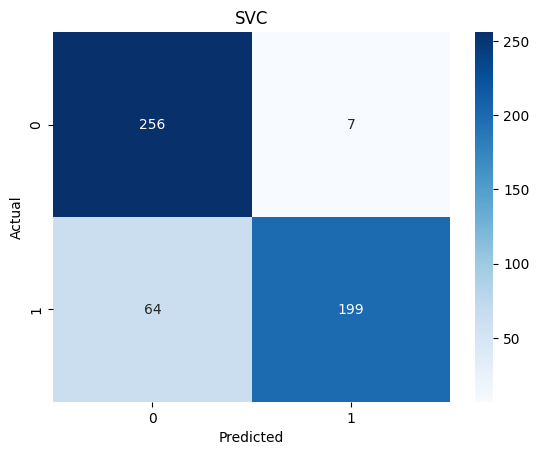

In [7]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

print("SVM Results")
evaluate_model(svm, X_test, y_test)

Random Forest Results
Accuracy : 0.9125475285171103
Precision: 0.9157088122605364
Recall   : 0.908745247148289
F1 Score : 0.9122137404580153

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       263
           1       0.92      0.91      0.91       263

    accuracy                           0.91       526
   macro avg       0.91      0.91      0.91       526
weighted avg       0.91      0.91      0.91       526



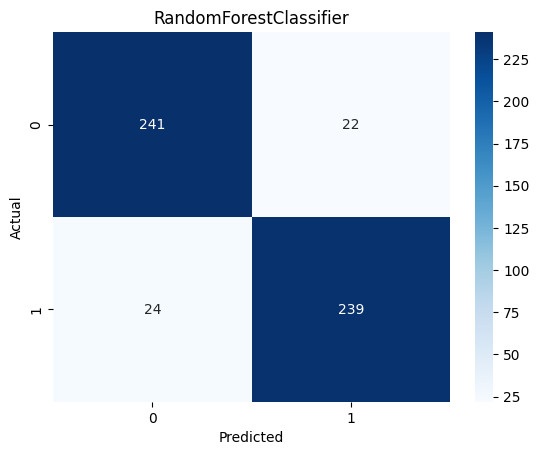

In [8]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

print("Random Forest Results")
evaluate_model(rf, X_test, y_test)

In [9]:
results = []

models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.849810,0.910714,0.775665,0.837782
1,SVM,0.865019,0.966019,0.756654,0.848614
2,Random Forest,0.912548,0.915709,0.908745,0.912214


In [10]:
import joblib

# Save the best performing model (Random Forest)
joblib.dump(rf, "../model/phishing_model.pkl")

print("Random Forest model saved successfully as phishing_model.pkl")

Random Forest model saved successfully as phishing_model.pkl


In [11]:
y.value_counts()

NameError: name 'y' is not defined